Basic stats using the cars dataset

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display

pd.options.display.max_columns = 100

cars_data = pd.read_csv('cars_csv.csv')

#print sample of dataframe:
display(cars_data.sample(5))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
77,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1944,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,169.1,66.0,51.0,2293,ohc,four,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
33,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695


That's cool and everything but let's just look at one column , clean it up, and then do some stats:

In [25]:
#Cleaning (remove NaNs and '?' entries)
column = cars_data.ix[:, 'horsepower']
column.replace('?', np.nan, inplace = True)
column.dropna(inplace = True)

In [26]:
#Lets get the 'population' stats;
column = pd.to_numeric(column)
pop_mean = column.mean()
print("Population mean: {}".format(pop_mean))
pop_std = np.std(column)
print("Population standard deviation: {}".format(pop_std))

Population mean: 104.25615763546799
Population standard deviation: 39.61642938052156


In [27]:
#Now let's grab a sample and see how we go;
sample = column.sample(n=10)
smpl_mean = sample.mean()
print("Samplw mean: {}".format(smpl_mean))
smpl_std = np.std(sample)
print("Sample standard error: {}".format(smpl_std))

Samplw mean: 100.9
Sample standard error: 27.897849379477265


Let's do some plots of the distribution and also the distribution of t-statistics

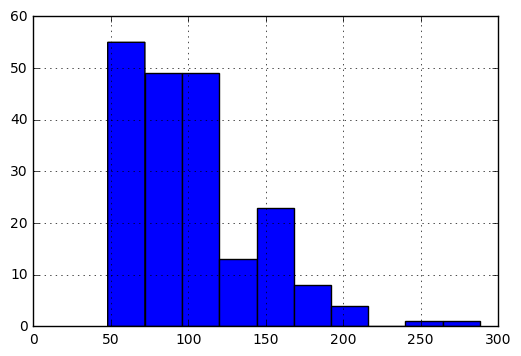

In [28]:
column.hist()

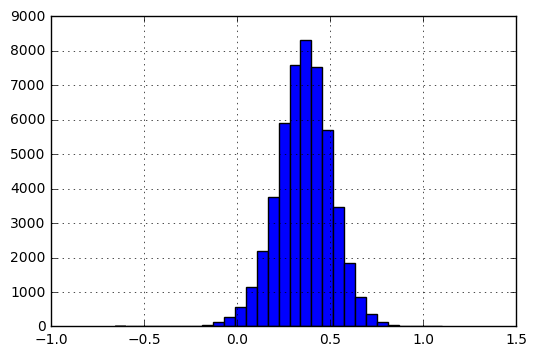

In [41]:
#Value for the assumed population mean:
mu = 90
t_stat = []
for _ in range(50000):
    sample = column.sample(n=30)
    smpl_mean = sample.mean()
    smpl_std = np.std(sample)
    t_stat.append((smpl_mean - mu) / smpl_std)
    
#Plot the histogram:
pd.Series(t_stat).hist(bins = 30)

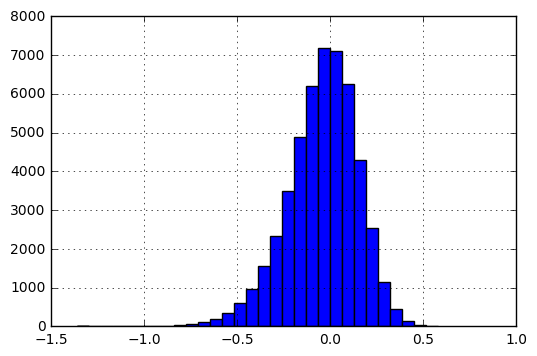

In [42]:
#Value for the assumed population mean:
mu = 100
t_stat = []
for _ in range(50000):
    sample = column.sample(n=30)
    smpl_mean = sample.mean()
    smpl_std = np.std(sample)
    t_stat.append((smpl_mean - mu) / smpl_std)
    
#Plot the histogram:
pd.Series(t_stat).hist(bins = 30)

Notice how the mean of the second distribution is much closer to 0. This signifies that it is a better approximation of $\mu$.

Now let's calculate the 95% confidence interval (the band within 2 Standard Errors to either side of our population mean;

In [45]:
#Get a sample:
sample = column.sample(n=10)
smpl_mean = sample.mean()
smpl_std = np.std(sample)
print("95% confidence interval: {} to {}".format(smpl_mean - 2*smpl_std, smpl_mean + 2 * smpl_std))

95% confidence interval: 46.68901629395643 to 152.31098370604357


Let's now grab two random samples and try to work out whether they are likely to be from the same distribution:

In [52]:
s1, s2 = column.sample(n=10), column.sample(n=10)
s1_mean, s2_mean = s1.mean(), s2.mean()
smpl_std = np.std(s1.append(s2))
t_stat = abs(s1_mean-s2_mean)/smpl_std
print("The t-stat of sample 1 and 2 is {}.".format(t_stat))

The t-stat of sample 1 and 2 is 0.496121291542002.


146     82
119    102
122     68
1      111
120     68
178    161
86      88
80     116
106    160
95      69
43      78
5      110
61      84
112     95
146     82
25      68
90      55
201    160
123     88
177     92
Name: horsepower, dtype: int64